In [189]:
import pandas as pd




In [190]:
df = pd.read_csv(r'/content/AAPL.csv')
df.head()




,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [191]:
df.tail()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [192]:
df1=df.reset_index()['close']

df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

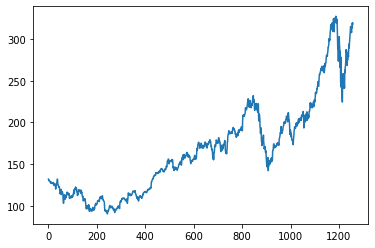

In [193]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [194]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [195]:
training_size = int(len(df1)*0.65)

test_size = int(len(df1)-training_size)
training_data,test_data = df1[0:training_size,:],df1[training_size:,:]

In [196]:
def create_dataset(dataset,timesteps=1):
  
  X,Y=[],[]
  for i in range(len(dataset)-timesteps-1):
    a=dataset[i:(i+timesteps),0]
    X.append(a)
    Y.append(dataset[i+timesteps,0])
  return np.array(X),np.array(Y)

In [197]:

timesteps=100
X_train,Y_train = create_dataset(training_data,timesteps)
X_test,Y_test= create_dataset(test_data,timesteps)

In [44]:

X_train = X_train.reshape(716,100,1)
X_test = X_test.reshape(340,100,1)

In [198]:

import keras
callbacks_list = [keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True)
]

In [199]:

from keras.layers import LSTM,Flatten,Dense
from keras import Input
from keras.models import Model

In [200]:

input = Input(shape=(100,1))
Layer_1 = LSTM(50,activation='relu',return_sequences=True)(input)
Layer_2 = LSTM(50,activation='relu',return_sequences=True)(Layer_1)
Layer_3 = LSTM(50,activation='relu')(Layer_2)
Layer_4 = Flatten()(Layer_3 )
Layer_5 = Dense(50,activation='relu')(Layer_4 )
Layer_6 = Dense(12,activation='relu')(Layer_5 )
output = Dense(1)(Layer_6)
model = Model(input,output)



In [201]:

model.compile(loss='mean_squared_error',optimizer='Adam')

In [202]:

model.fit(X_train,Y_train,epochs=100,validation_split=0.2,callbacks=callbacks_list)

Epoch 1/100
18/18 [==============================] - 3s 170ms/step - loss: 0.0170 - val_loss: 0.0178
Epoch 2/100
18/18 [==============================] - 3s 144ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 3/100
18/18 [==============================] - 3s 171ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 4/100
18/18 [==============================] - 4s 228ms/step - loss: 6.7243e-04 - val_loss: 0.0023
Epoch 5/100
18/18 [==============================] - 3s 159ms/step - loss: 5.3507e-04 - val_loss: 0.0019
Epoch 6/100
18/18 [==============================] - 2s 138ms/step - loss: 5.0607e-04 - val_loss: 0.0012
Epoch 7/100
18/18 [==============================] - 3s 140ms/step - loss: 4.5007e-04 - val_loss: 0.0012
Epoch 8/100
18/18 [==============================] - 3s 149ms/step - loss: 4.2902e-04 - val_loss: 0.0012
Epoch 9/100
18/18 [==============================] - 3s 144ms/step - loss: 4.5645e-04 - val_loss: 0.0018
Epoch 10/100
18/18 [==============================] - 3s 142ms/step

In [203]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [204]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [205]:

import math
from sklearn.metrics import mean_squared_error

In [206]:

math.sqrt(mean_squared_error(train_predict,Y_train))

143.30167008600463

In [207]:

math.sqrt(mean_squared_error(test_predict,Y_test))

248.6167251823721

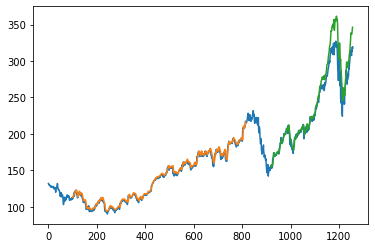

In [208]:

import numpy
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [209]:

len(test_data)

441

In [210]:
test_data.shape


x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [211]:
temp_input = test_data[341:,:].reshape(1,100)


In [212]:
temp_input = list(temp_input)


tempt_input =tempt_input[0].tolist()

In [213]:
# temp_input


In [214]:
temp_input =temp_input[0].tolist()


In [215]:
len(temp_input)


100

In [216]:

i=0
while i<30:
  input = np.array(tempt_input[i:]).reshape(1,100,1)
  print(f'Previous 100 days Data {input}')
  Y_hat = model.predict(input)
  Y_hat =Y_hat.flatten()
  # Y_hat = float(Y_hat)
  print(f'Output of {i} day is {Y_hat}')
  tempt_input.append(Y_hat[0])
  i+=1

Previous 100 days Data [[[0.85835515]
  [0.8866419 ]
  [0.87431394]
  [0.88431985]
  [0.87836697]
  [0.8986321 ]
  [0.92582116]
  [0.92877649]
  [0.95676771]
  [0.93869797]
  [0.93304061]
  [0.94950604]
  [0.96424048]
  [0.95512117]
  [0.95989192]
  [0.96635143]
  [0.96246728]
  [0.92295027]
  [0.9598497 ]
  [0.98792536]
  [0.98594106]
  [0.92531453]
  [0.92172591]
  [0.96474711]
  [0.97572406]
  [0.99159841]
  [0.96972895]
  [0.97614625]
  [0.96795575]
  [1.        ]
  [0.99016297]
  [0.99050072]
  [0.96538039]
  [0.98488559]
  [0.97086887]
  [0.94026007]
  [0.87748037]
  [0.83483915]
  [0.85413324]
  [0.77336823]
  [0.77269273]
  [0.88014017]
  [0.84007431]
  [0.89673225]
  [0.85527316]
  [0.83884995]
  [0.74233725]
  [0.82327113]
  [0.78143207]
  [0.6665963 ]
  [0.7921557 ]
  [0.64118044]
  [0.68614371]
  [0.66001013]
  [0.65203074]
  [0.58642236]
  [0.56586169]
  [0.66089673]
  [0.65515494]
  [0.70970193]
  [0.66452757]
  [0.69437642]
  [0.69218104]
  [0.63569197]
  [0.65266402]
  

In [217]:
# from


X_train = X_train.reshape(716,100,1)
X_test = X_test.reshape(340,100,1)